In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Titanic.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

PassengerId      Pclass         Age       SibSp       Parch  \
count   891.000000  891.000000  714.000000  891.000000  891.000000   
mean    446.000000    2.308642   29.699118    0.523008    0.381594   
std     257.353842    0.836071   14.526497    1.102743    0.806057   
min       1.000000    1.000000    0.420000    0.000000    0.000000   
25%     223.500000    2.000000   20.125000    0.000000    0.000000   
50%     446.000000    3.000000   28.000000    0.000000    0.000000   
75%     668.500000    3.000000   38.000000    1.000000    0.000000   
max     891.000000    3.000000   80.000000    8.000000    6.000000   

             Fare    Survived  
count  891.000000  891.000000  
mean    32.204208    0.383838  
std     49.693429    0.486592  
min      0.000000    0.000000  
25%      7.910400    0.000000  
50%     14.454200    0.000000  
75%     31.000000    1.000000  
max    512.329200    1.000000

In [5]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [6]:
df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [7]:
pd.isna(df['Age']).sum()

177

In [8]:
df['Age'].isna().sum()

177

In [9]:
df.Age.isna().sum()

177

In [10]:
df.shape  

(891, 12)

In [11]:
df.head(7)

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   
5            6       3                                   Moran, Mr. James   
6            7       1                            McCarthy, Mr. Timothy J   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500   NaN        S   
5    male   NaN      0      0            330877   8.4583   NaN        Q   
6    male  54.0      0      0             17463  51.8625   E46        S   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0  
5         0  
6         0

In [12]:
df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip()).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [13]:
def f(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

In [14]:
def g(tt):
    if tt in ['Mr']:
        return 1
    elif tt in ['Master']:
        return 3
    elif tt in ['Ms', 'Mlle', 'Miss']:
        return 4
    elif tt in ['Mrs','Mme']:
        return 5
    else:
        return 2

In [15]:
tt="qqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqq"
%timeit if tt in ['Mr']:    pass


104 ns ± 11.4 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [16]:
tt="qqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqq"
%timeit if tt =='Mr':    pass #Checks which code is faster (The %timeit part)

72.2 ns ± 8.29 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [17]:
df['title'] = df['Name'].apply(f).apply(g)
df.head(5)

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500   NaN        S   

   Survived  title  
0         0      1  
1         1      5  
2         1      4  
3         1      5  
4         0      1

In [18]:
df['title2'] = df['Name'].transform(lambda x: x.split(',')[1].split('.')[0].strip())

In [19]:
df

PassengerId  Pclass                                               Name  \
0              1       3                            Braund, Mr. Owen Harris   
1              2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3       3                             Heikkinen, Miss. Laina   
3              4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5       3                           Allen, Mr. William Henry   
..           ...     ...                                                ...   
886          887       2                              Montvila, Rev. Juozas   
887          888       1                       Graham, Miss. Margaret Edith   
888          889       3           Johnston, Miss. Catherine Helen "Carrie"   
889          890       1                              Behr, Mr. Karl Howell   
890          891       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0      male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1    female  38.0      1      0          PC 17599  71.2833   C85        C   
2    female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3    female  35.0      1      0            113803  53.1000  C123        S   
4      male  35.0      0      0            373450   8.0500   NaN        S   
..      ...   ...    ...    ...               ...      ...   ...      ...   
886    male  27.0      0      0            211536  13.0000   NaN        S   
887  female  19.0      0      0            112053  30.0000   B42        S   
888  female   NaN      1      2        W./C. 6607  23.4500   NaN        S   
889    male  26.0      0      0            111369  30.0000  C148        C   
890    male  32.0      0      0            370376   7.7500   NaN        Q   

     Survived  title title2  
0           0      1     Mr  
1           1      5    Mrs  
2           1      4   Miss  
3           1      5    Mrs  
4           0      1     Mr  
..        ...    ...    ...  
886         0      2    Rev  
887         1      4   Miss  
888         0      4   Miss  
889         1      1     Mr  
890         0      1     Mr  

[891 rows x 14 columns]

In [20]:
pd.crosstab(df['Sex'], df['title2'])

title2  Capt  Col  Don  Dr  Jonkheer  Lady  Major  Master  Miss  Mlle  Mme  \
Sex                                                                          
female     0    0    0   1         0     1      0       0   182     2    1   
male       1    2    1   6         1     0      2      40     0     0    0   

title2   Mr  Mrs  Ms  Rev  Sir  the Countess  
Sex                                           
female    0  125   1    0    0             1  
male    517    0   0    6    1             0

In [21]:
t = pd.crosstab(df['title'], df['Survived'])
t

Survived    0    1
title             
1         436   81
2          15    8
3          17   23
4          55  130
5          26  100

In [22]:
tt2= pd.crosstab(df['Sex'], df['Survived'] )
tt2

Survived    0    1
Sex               
female     81  233
male      468  109

In [23]:
 (81 + 233)

314

In [24]:
round(tt2.div(tt2.sum(1), axis=0) * 100, 2)

Survived      0      1
Sex                   
female    25.80  74.20
male      81.11  18.89

In [25]:
tt2.sum(1)

Sex
female    314
male      577
dtype: int64

In [26]:
t_pct = t.div(t.sum(1).astype(float), axis=0) #Percentage of people that survived by title
t_pct * 100

Survived          0          1
title                         
1         84.332689  15.667311
2         65.217391  34.782609
3         42.500000  57.500000
4         29.729730  70.270270
5         20.634921  79.365079

Text(0, 0.5, 'Survival Rate')

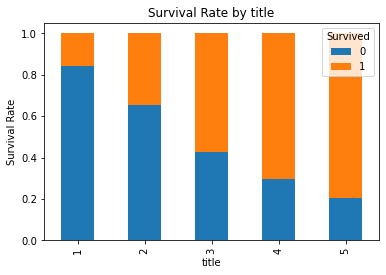

In [27]:
t_pct.plot(kind='bar',stacked=True, title='Survival Rate by title')

plt.xlabel('title')

plt.ylabel('Survival Rate')

In [28]:
# drop unnecessary columns

In [29]:
df = df.drop(['PassengerId','Name','Ticket'], axis=1)   
df.head()

Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked  Survived  \
0       3    male  22.0      1      0   7.2500   NaN        S         0   
1       1  female  38.0      1      0  71.2833   C85        C         1   
2       3  female  26.0      0      0   7.9250   NaN        S         1   
3       1  female  35.0      1      0  53.1000  C123        S         1   
4       3    male  35.0      0      0   8.0500   NaN        S         0   

   title title2  
0      1     Mr  
1      5    Mrs  
2      4   Miss  
3      5    Mrs  
4      1     Mr

In [30]:
# Embarked
# get_dummies: Convert categorical variable into dummy/indicator variables
edt  = pd.get_dummies(df['Embarked'])
edt

C  Q  S
0    0  0  1
1    1  0  0
2    0  0  1
3    0  0  1
4    0  0  1
..  .. .. ..
886  0  0  1
887  0  0  1
888  0  0  1
889  1  0  0
890  0  1  0

[891 rows x 3 columns]

In [31]:
edt.sum(axis = 1).sum()

889

In [32]:
df['Embarked'].isna().sum()

2

In [33]:
#edt
edt.drop(['S'], axis=1, inplace=True)

In [34]:
df = df.join(edt) #Joins the two columns from edt, because we dropped the "S" column from the last dataframe
df

Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked  Survived  \
0         3    male  22.0      1      0   7.2500   NaN        S         0   
1         1  female  38.0      1      0  71.2833   C85        C         1   
2         3  female  26.0      0      0   7.9250   NaN        S         1   
3         1  female  35.0      1      0  53.1000  C123        S         1   
4         3    male  35.0      0      0   8.0500   NaN        S         0   
..      ...     ...   ...    ...    ...      ...   ...      ...       ...   
886       2    male  27.0      0      0  13.0000   NaN        S         0   
887       1  female  19.0      0      0  30.0000   B42        S         1   
888       3  female   NaN      1      2  23.4500   NaN        S         0   
889       1    male  26.0      0      0  30.0000  C148        C         1   
890       3    male  32.0      0      0   7.7500   NaN        Q         0   

     title title2  C  Q  
0        1     Mr  0  0  
1        5    Mrs  1  0  
2        4   Miss  0  0  
3        5    Mrs  0  0  
4        1     Mr  0  0  
..     ...    ... .. ..  
886      2    Rev  0  0  
887      4   Miss  0  0  
888      4   Miss  0  0  
889      1     Mr  1  0  
890      1     Mr  0  1  

[891 rows x 13 columns]

In [35]:
df.drop(['Embarked'], axis=1,inplace=True)
df.head(3)

Pclass     Sex   Age  SibSp  Parch     Fare Cabin  Survived  title title2  \
0       3    male  22.0      1      0   7.2500   NaN         0      1     Mr   
1       1  female  38.0      1      0  71.2833   C85         1      5    Mrs   
2       3  female  26.0      0      0   7.9250   NaN         1      4   Miss   

   C  Q  
0  0  0  
1  1  0  
2  0  0

In [36]:
#example groupby

In [37]:
df2 = pd.DataFrame({'Bird' : ['A', 'A', 'B', 'B', 'B'],'Speed' : [380, 370, 24, 26,np.nan]})
df2

Bird  Speed
0    A  380.0
1    A  370.0
2    B   24.0
3    B   26.0
4    B    NaN

In [38]:
df2.groupby(['Bird']).mean() #Joins all rows, determining the rows by "Bird" now and doing the mean of the speed value

Speed
Bird       
A     375.0
B      25.0

In [39]:
df2['Speed'] = df2.groupby(['Bird'])['Speed'].transform(lambda x: x.fillna(x.mean()))
df2

Bird  Speed
0    A  380.0
1    A  370.0
2    B   24.0
3    B   26.0
4    B   25.0

In [40]:
# Age impute
df

Pclass     Sex   Age  SibSp  Parch     Fare Cabin  Survived  title  \
0         3    male  22.0      1      0   7.2500   NaN         0      1   
1         1  female  38.0      1      0  71.2833   C85         1      5   
2         3  female  26.0      0      0   7.9250   NaN         1      4   
3         1  female  35.0      1      0  53.1000  C123         1      5   
4         3    male  35.0      0      0   8.0500   NaN         0      1   
..      ...     ...   ...    ...    ...      ...   ...       ...    ...   
886       2    male  27.0      0      0  13.0000   NaN         0      2   
887       1  female  19.0      0      0  30.0000   B42         1      4   
888       3  female   NaN      1      2  23.4500   NaN         0      4   
889       1    male  26.0      0      0  30.0000  C148         1      1   
890       3    male  32.0      0      0   7.7500   NaN         0      1   

    title2  C  Q  
0       Mr  0  0  
1      Mrs  1  0  
2     Miss  0  0  
3      Mrs  0  0  
4       Mr  0  0  
..     ... .. ..  
886    Rev  0  0  
887   Miss  0  0  
888   Miss  0  0  
889     Mr  1  0  
890     Mr  0  1  

[891 rows x 12 columns]

In [41]:
df['Age'].isna().sum()

177

In [42]:
df['Age'].notna().sum()

714

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     204 non-null    object 
 7   Survived  891 non-null    int64  
 8   title     891 non-null    int64  
 9   title2    891 non-null    object 
 10  C         891 non-null    uint8  
 11  Q         891 non-null    uint8  
dtypes: float64(2), int64(5), object(3), uint8(2)
memory usage: 71.5+ KB


In [44]:
df['Age'] = df.groupby(['Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))
df

Pclass     Sex       Age  SibSp  Parch     Fare Cabin  Survived  title  \
0         3    male  22.00000      1      0   7.2500   NaN         0      1   
1         1  female  38.00000      1      0  71.2833   C85         1      5   
2         3  female  26.00000      0      0   7.9250   NaN         1      4   
3         1  female  35.00000      1      0  53.1000  C123         1      5   
4         3    male  35.00000      0      0   8.0500   NaN         0      1   
..      ...     ...       ...    ...    ...      ...   ...       ...    ...   
886       2    male  27.00000      0      0  13.0000   NaN         0      2   
887       1  female  19.00000      0      0  30.0000   B42         1      4   
888       3  female  25.14062      1      2  23.4500   NaN         0      4   
889       1    male  26.00000      0      0  30.0000  C148         1      1   
890       3    male  32.00000      0      0   7.7500   NaN         0      1   

    title2  C  Q  
0       Mr  0  0  
1      Mrs  1  0  
2     Miss  0  0  
3      Mrs  0  0  
4       Mr  0  0  
..     ... .. ..  
886    Rev  0  0  
887   Miss  0  0  
888   Miss  0  0  
889     Mr  1  0  
890     Mr  0  1  

[891 rows x 12 columns]

In [45]:
df['Cabin'].isna().sum()

687

In [46]:
df['Cabin'].notna().sum()

204

In [47]:
687 * 100 /(687 + 204)

77.10437710437711

In [48]:
# Cabin
# It has a lot of NaN values, so it won't cause a remarkable impact on prediction
df.drop("Cabin",axis=1,inplace=True)
df

Pclass     Sex       Age  SibSp  Parch     Fare  Survived  title title2  \
0         3    male  22.00000      1      0   7.2500         0      1     Mr   
1         1  female  38.00000      1      0  71.2833         1      5    Mrs   
2         3  female  26.00000      0      0   7.9250         1      4   Miss   
3         1  female  35.00000      1      0  53.1000         1      5    Mrs   
4         3    male  35.00000      0      0   8.0500         0      1     Mr   
..      ...     ...       ...    ...    ...      ...       ...    ...    ...   
886       2    male  27.00000      0      0  13.0000         0      2    Rev   
887       1  female  19.00000      0      0  30.0000         1      4   Miss   
888       3  female  25.14062      1      2  23.4500         0      4   Miss   
889       1    male  26.00000      0      0  30.0000         1      1     Mr   
890       3    male  32.00000      0      0   7.7500         0      1     Mr   

     C  Q  
0    0  0  
1    1  0  
2    0  0  
3    0  0  
4    0  0  
..  .. ..  
886  0  0  
887  0  0  
888  0  0  
889  1  0  
890  0  1  

[891 rows x 11 columns]

In [49]:
##sexes
s = sorted(df['Sex'].unique())
s     

['female', 'male']

In [50]:
list(zip(s, range(len(s)) ))

[('female', 0), ('male', 1)]

In [51]:
gm = dict(zip(s, range(len(s)) ))
gm

{'female': 0, 'male': 1}

In [52]:
df['Sex'].head(5)

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [53]:
df['Sex'] = df['Sex'].map(gm).astype(int)
df['Sex'].head(5) #Replacing string of sexes by number, female = 0, male = 1 

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32

In [54]:
list(zip('abcadefg', range(4), range(6)))

[('a', 0, 0), ('b', 1, 1), ('c', 2, 2), ('a', 3, 3)]